In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [0]:
import tensorflow as tf
from tensorflow import keras
dataset = keras.datasets.mnist

In [0]:
(X_train_f, Y_train_f), (X_test_f, Y_test_f) = dataset.load_data()

In [10]:
# Lấy toàn bộ dữ liệu từ keras (train: 60000 - test:)
print(X_train_f.shape[0],'train sample')
print(X_test_f.shape[0],'test sample')

60000 train sample
10000 test sample


In [0]:
# Cắt lấy 1 phần bộ dữ liệu từ keras (train: 600 - test: 100)
X_train=X_train_f[:600,:]
Y_train = Y_train_f[:600]
X_test = X_test_f[:100, :]
Y_test = Y_test_f[:100]

# 1 ảnh là 1 ma trận trọng số - ảnh càng rõ, màu (phân biệt) càng nổi bật
# Định dạng ảnh : 28x28 -> train: 600x28x28 ; test: 100x28x28

In [12]:
# nhãn test (số thực tế đc phân tách từ ảnh) 
Y_train
# Problem: Cần thống kê dữ liệu 
# (thống kê sl số xuất hiện có đc phân bố đều hay k)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [13]:
# Thống kê sl số xuất hiện trên toàn bộ tập dữ liệu (tập FULL)
print("Length of data: ",len(X_train_f))
print("Number of class: ",len(np.unique(Y_train_f)))
a,c = np.unique(Y_train_f, return_counts=True)
for i in range(len(a)):
  print(a[i],'\t',c[i])

Length of data:  60000
Number of class:  10
0 	 5923
1 	 6742
2 	 5958
3 	 6131
4 	 5842
5 	 5421
6 	 5918
7 	 6265
8 	 5851
9 	 5949


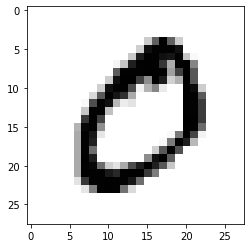

In [14]:
# Visualize
t = X_train[1, :] 
plt.imshow(t, cmap = plt.get_cmap('gray_r'))

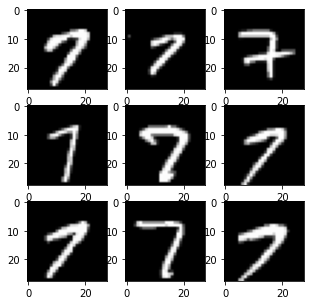

In [15]:
# Visualize matrix 3x3 (number=7)
plt.figure(figsize=(5,5))
pics7_indices = np.where(Y_train == 7)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[pics7_indices[0][i]],cmap='gray')
plt.show()

In [0]:
# Reshape là chuyển về dạng 2 dữ liệu 2 chiều (dữ liệu đầu vào là 3d-ray)
X_train = X_train.reshape(600, -1)
X_test = X_test.reshape(100, -1)

In [0]:
# Standard dataset về dạng kì vọng = 0, phương sai = 1
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [18]:
# Preprocessing - Trainning data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,max_iter=600)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix to evaluate the accuracy of a classification..
cm = confusion_matrix(Y_train,classifier.predict(X_train))
cm1 = confusion_matrix(Y_test,classifier.predict(X_test))
print("\n Train data\n",cm)
print ("\nTest data\n", cm1)

# Computes subset accuracy
acc = []
acc1 = []
acc.append(accuracy_score(Y_train, classifier.predict(X_train)))
acc1.append(accuracy_score(Y_test, classifier.predict(X_test)))
print("\nAccuracy: ",acc)
print("\nAccuracy: ",acc1)


 Train data
 [[58  0  0  0  0  0  0  0  0  0]
 [ 0 79  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  0  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  0 65]]

Test data
 [[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  1  0  0  0  0]
 [ 0  0  2  7  0  2  0  0  0  0]
 [ 0  0  0  0 12  1  0  0  0  1]
 [ 0  0  0  0  1  6  0  0  0  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  1 12  0  2]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  1  9]]

Accuracy:  [1.0]

Accuracy:  [0.85]
